# Análisis exploratorio Desempeño de Estudiates

## Instalación de librerías

In [1]:
#!pip install missingno

## Importar librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
#from dataprep.eda import create_report, plot

## Recolección de datos

In [3]:
# Leer el dataset
df = pd.read_csv('Student Performance new.csv', index_col=0)
df

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,0.88,0.99,0.95,F
996,group C,high school,free/reduced,none,0.62,0.55,0.55,M
997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F
998,group D,some college,standard,completed,0.68,0.78,0.77,F


In [4]:
# Columnas
df.columns.to_list()

['race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math percentage',
 'reading score percentage',
 'writing score percentage',
 'sex']

## Revisión estadística

In [31]:
# Resumen estadístico de la información del dataset
df.describe(include="all")

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000
unique,5,6,2,2,NaN,NaN,NaN,2
top,group C,some college,standard,none,NaN,NaN,NaN,F
freq,319,226,645,642,NaN,NaN,NaN,518
mean,NaN,NaN,NaN,NaN,0.660890,0.691690,0.680540,NaN
std,NaN,NaN,NaN,NaN,0.151631,0.146002,0.151957,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.170000,0.100000,NaN
25%,NaN,NaN,NaN,NaN,0.570000,0.590000,0.577500,NaN
50%,NaN,NaN,NaN,NaN,0.660000,0.700000,0.690000,NaN
75%,NaN,NaN,NaN,NaN,0.770000,0.790000,0.790000,NaN


In [30]:
#Información de las variables del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   object 
 1   parental level of education  1000 non-null   object 
 2   lunch                        1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math percentage              1000 non-null   float64
 5   reading score percentage     1000 non-null   float64
 6   writing score percentage     1000 non-null   float64
 7   sex                          1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 70.3+ KB


## Clasificación de variables

In [6]:
# Numéricas
df_numeric = df[ [x for x in df.columns if df[x].dtype in ['int64','float64'] ] ]
df_numeric.head()

,math percentage,reading score percentage,writing score percentage
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75


In [7]:
# Object
df_object = df[ [x for x in df.columns if df[x].dtype == 'object'] ]
df_object.head()

,race/ethnicity,parental level of education,lunch,test preparation course,sex
0,group B,bachelor's degree,standard,none,F
1,group C,some college,standard,completed,F
2,group B,master's degree,standard,none,F
3,group A,associate's degree,free/reduced,none,M
4,group C,some college,standard,none,M


## Valores nulos

In [21]:
#Revisión de valores nulos
print(df.isna().sum())
print('\n------------------------------------------------------------------------------------------------------------------\n')
print(df.isnull().sum())

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

------------------------------------------------------------------------------------------------------------------

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64


<AxesSubplot:>

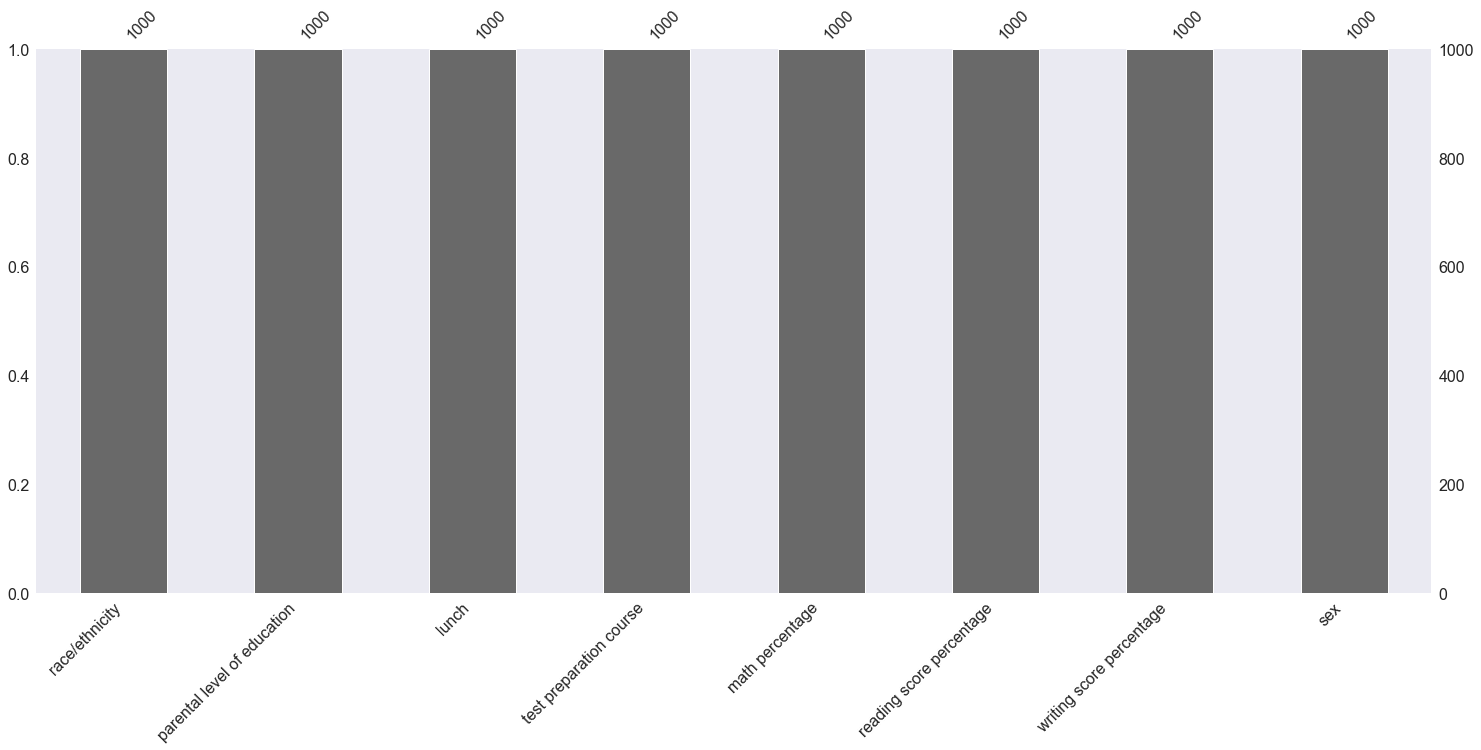

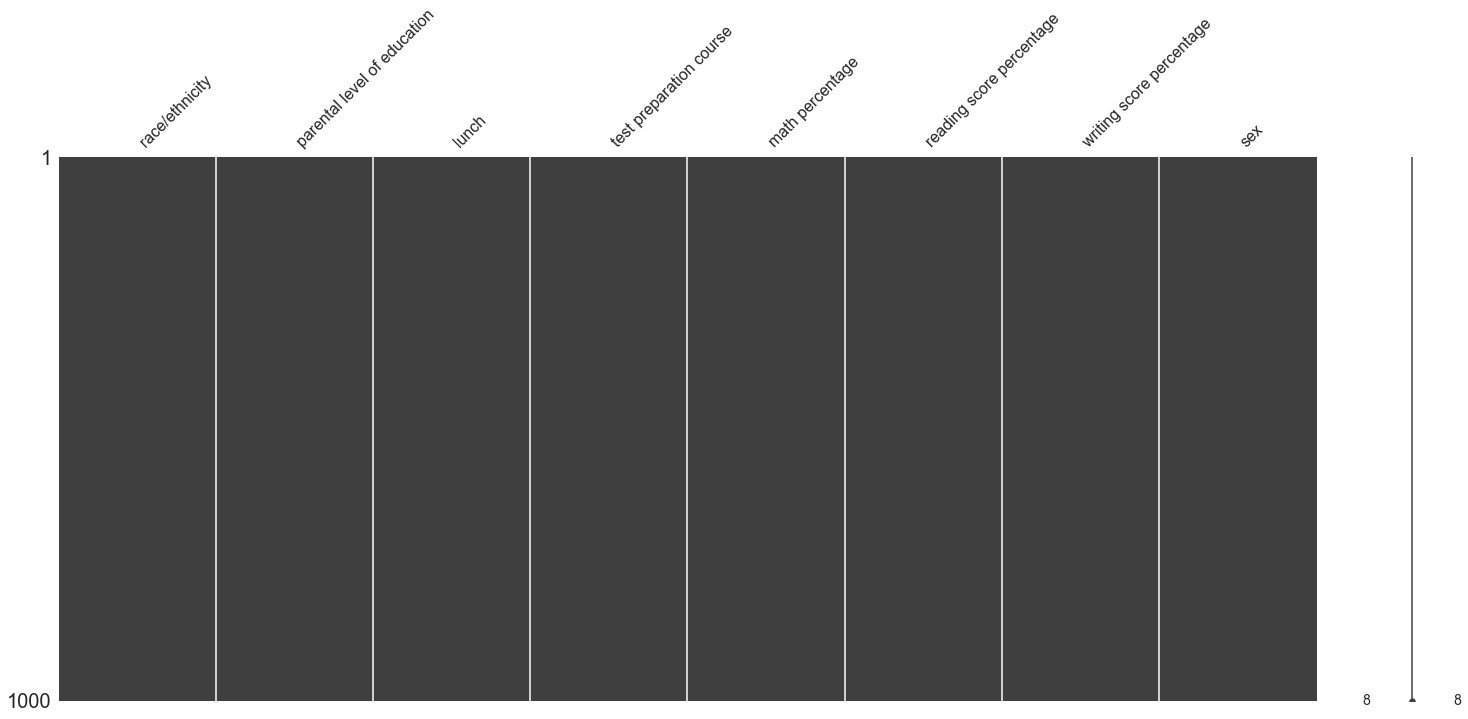

In [22]:
# gráfica de valores nulos
msno.bar(df)
msno.matrix(df)

### Reemplazo de valores nulos

In [20]:
# Reemplazar valores Nan por la media
for feature in df_numeric.columns:
    df[feature].fillna(df[feature].mean(), inplace=True)    

print(df.isna().sum())
print('\n------------------------------------------------------------------------------------------------------------------\n')
print(df.isnull().sum())

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

------------------------------------------------------------------------------------------------------------------

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64


## Visualización de datos

### Histogramas

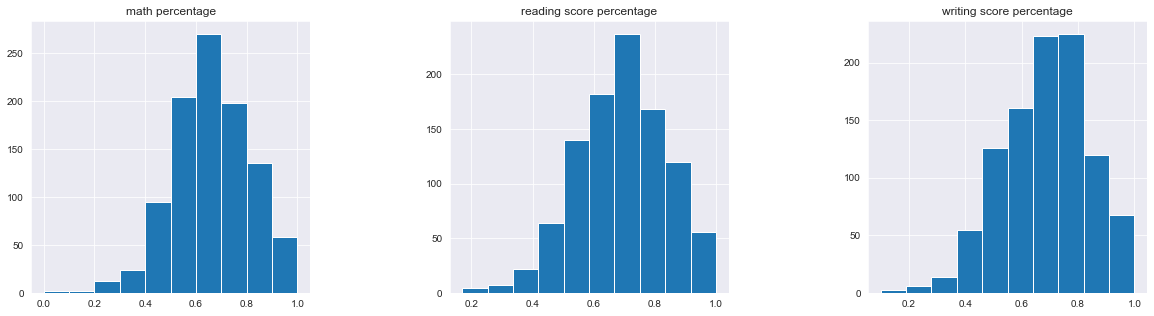

In [10]:
# Variables numéricas 
fig1 = plt.figure("Numéricas",figsize=(20, 5))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(1, len(df_numeric.columns)+1):
    ax = fig1.add_subplot(1, 3, i)
    ax.hist(df_numeric.iloc[:,i-1])
    ax.grid()
    ax.set_title(df_numeric.columns[i-1])
    
plt.show()

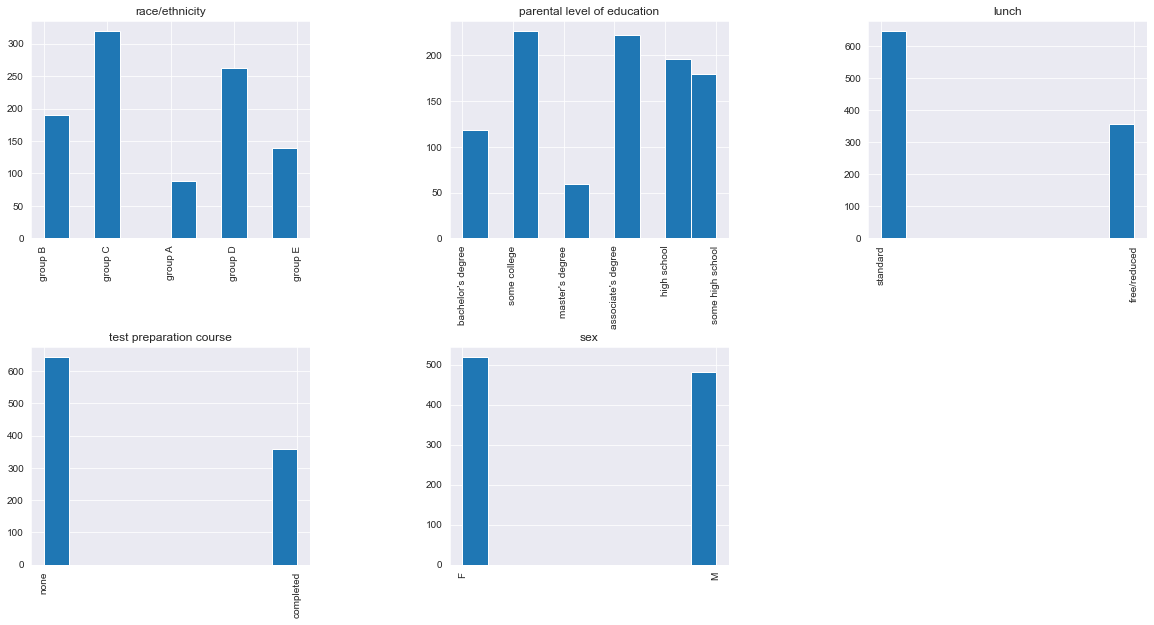

In [11]:
# variables object
fig2 = plt.figure("Object",figsize=(20, 10))
fig2.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(1, len(df_object.columns)+1):
    ax = fig2.add_subplot(2, 3, i)
    ax.hist(df_object.iloc[:,i-1])
    ax.grid()
    plt.xticks(rotation = 90)
    ax.set_title(df_object.columns[i-1])
    
plt.show()

### Dispersión

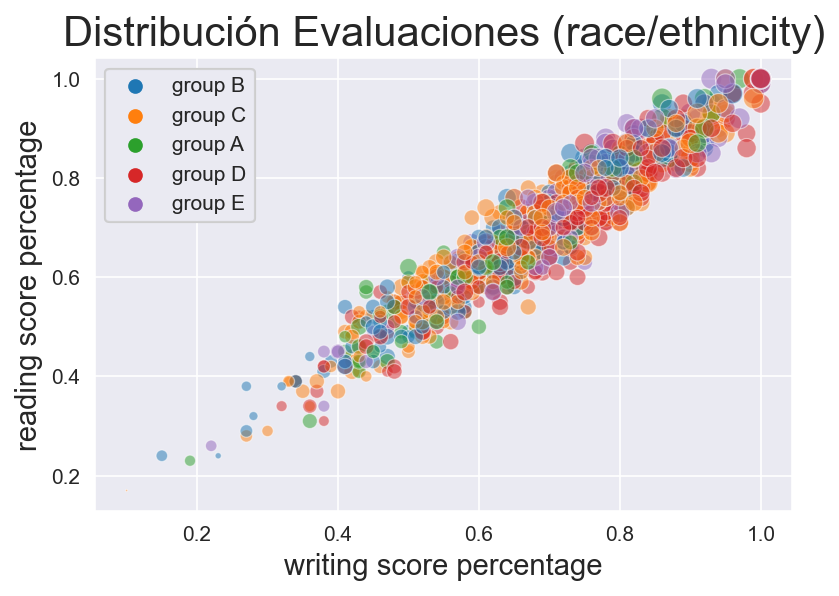

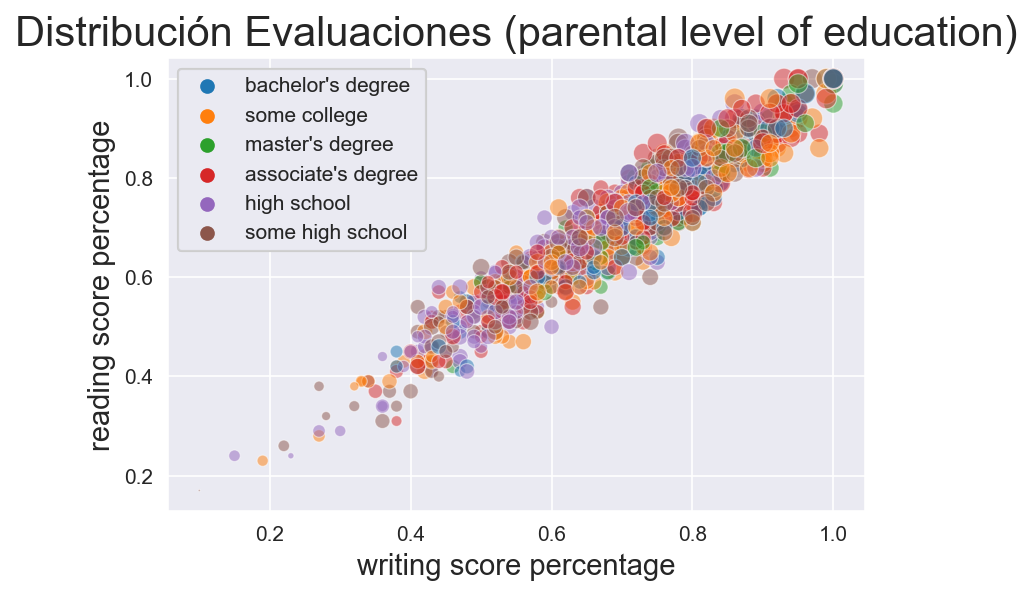

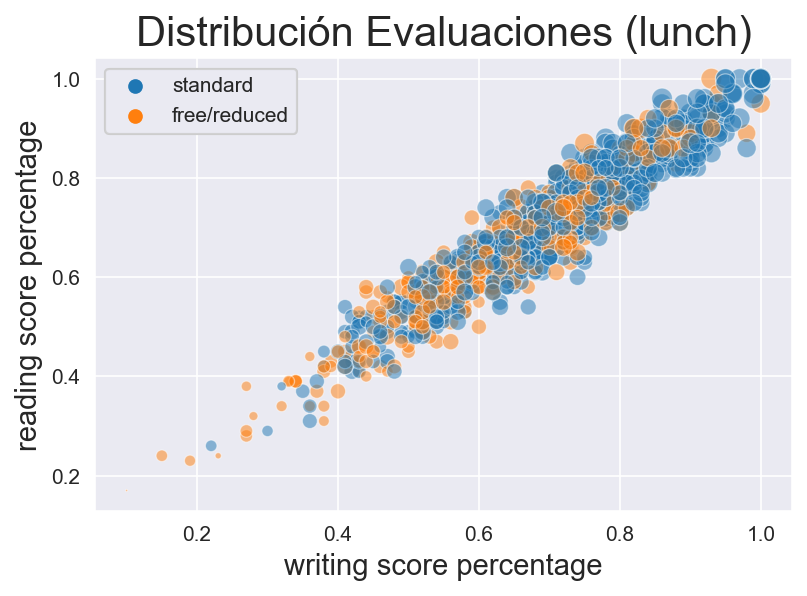

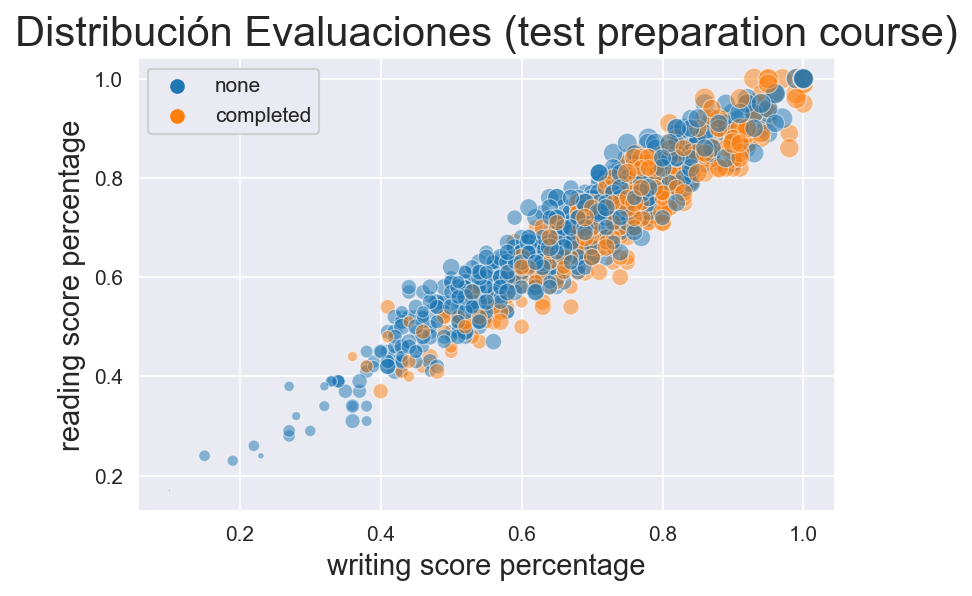

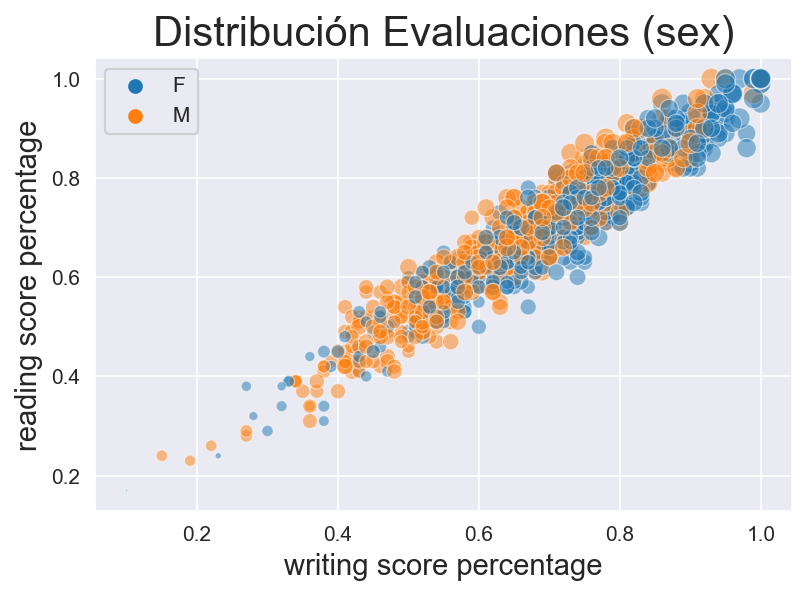

In [12]:
def read_vs_math(feature):

    plt.figure(dpi=150)
    np_math = np.array(df['math percentage'])
    np_math2 = np_math*2
    plot = sns.scatterplot(df['writing score percentage'], df['reading score percentage'], hue=df[feature], size=np_math, sizes=(1,100), alpha=0.5)
    h, l = plot.get_legend_handles_labels()
    n = len(df[feature].unique())
    col_lgd = plt.legend(h[:n], l[:n])
    plt.gca().add_artist(col_lgd)
    plt.grid(True)
    
    plt.xlabel('writing score percentage', fontsize=14)
    plt.ylabel('reading score percentage', fontsize=14)
    plot_title = 'Distribución Evaluaciones ({})'.format(feature)
    plt.title(plot_title, fontsize=20)
    plt.show()
    

for feature in df_object.columns:   
    read_vs_math(feature)

### Matriz de correlación

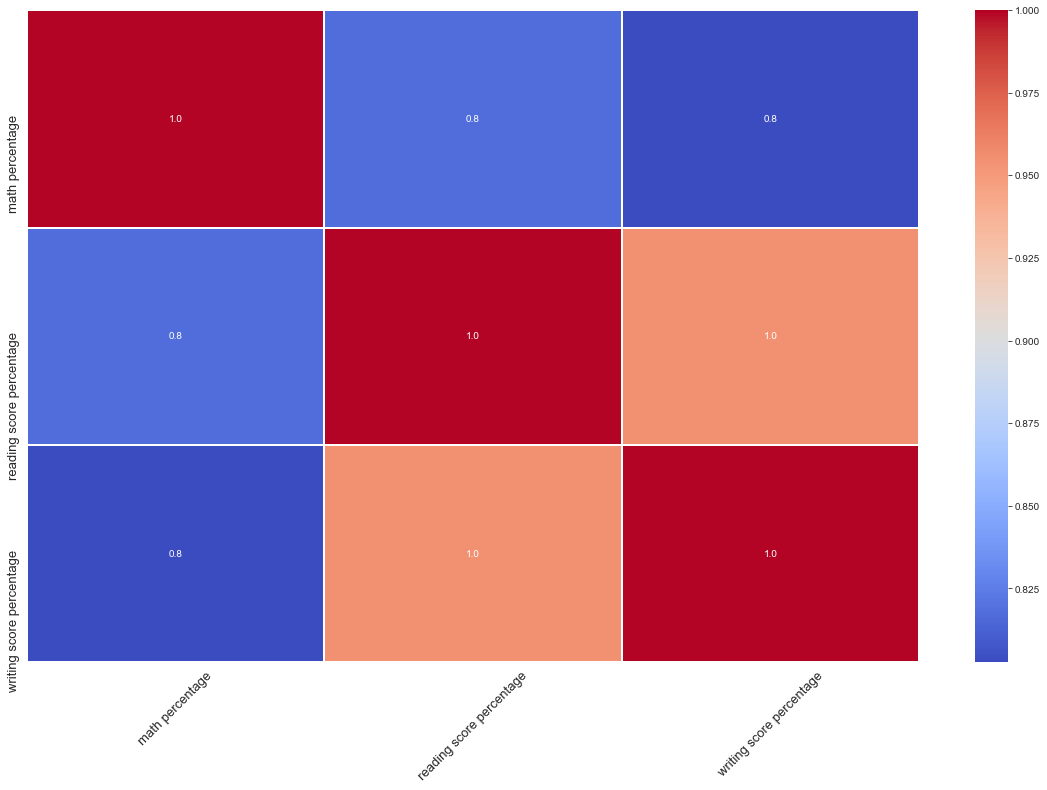

In [24]:
# Matriz de correlación
corr = df.corr(method='pearson') 

plt.figure(figsize=(20,12))
#upp_mat = np.triu(corr)
ax = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13,rotation=45)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 13)
plt.show()

In [14]:
# Dataframe de matriz de correlaciones
corr.style.background_gradient(cmap='coolwarm')

,math percentage,reading score percentage,writing score percentage
math percentage,1.000000,0.817580,0.802642
reading score percentage,0.817580,1.000000,0.954598
writing score percentage,0.802642,0.954598,1.000000


## Variables Categóricas

In [15]:
def explorar_tipo_objeto(df, feature):
  # checa cuantos datos categóricos (object) hay de alguna feature y devuleve los valores categóricos
    df_feature = pd.DataFrame(df[feature].value_counts())
    df_feature['porc (%)'] = df[feature].value_counts(normalize=True)*100
    print(df_feature)

In [16]:
# Revisión de cada colummna con la función explorar_tipo_objecto
for feature in df_object.columns:
    print('\n"' + str(feature) + '" Valores:')
    explorar_tipo_objeto(df, str(feature))
    print('\n---------------------------------------------------------------------------------------------------------------\n')


"race/ethnicity" Valores:
         race/ethnicity  porc (%)
group C             319      31.9
group D             262      26.2
group B             190      19.0
group E             140      14.0
group A              89       8.9

---------------------------------------------------------------------------------------------------------------


"parental level of education" Valores:
                    parental level of education  porc (%)
some college                                226      22.6
associate's degree                          222      22.2
high school                                 196      19.6
some high school                            179      17.9
bachelor's degree                           118      11.8
master's degree                              59       5.9

---------------------------------------------------------------------------------------------------------------


"lunch" Valores:
              lunch  porc (%)
standard        645      64.5
free/reduced    3

### Convertir variables categóricas en dummy

In [17]:
pd.options.display.max_columns = None
df_dummies = [ pd.get_dummies(df[feat], prefix = feat, prefix_sep = ':') for feat in df_object.columns ]
df_dummies = pd.concat(df_dummies, axis = 1)
df2 = pd.concat([df, df_dummies], axis = 1)
df2

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex,race/ethnicity:group A,race/ethnicity:group B,race/ethnicity:group C,race/ethnicity:group D,race/ethnicity:group E,parental level of education:associate's degree,parental level of education:bachelor's degree,parental level of education:high school,parental level of education:master's degree,parental level of education:some college,parental level of education:some high school,lunch:free/reduced,lunch:standard,test preparation course:completed,test preparation course:none,sex:F,sex:M
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,group C,some college,standard,none,0.76,0.78,0.75,M,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,0.88,0.99,0.95,F,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0
996,group C,high school,free/reduced,none,0.62,0.55,0.55,M,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
998,group D,some college,standard,completed,0.68,0.78,0.77,F,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0


In [18]:
# columnas del nuevo dataframe
df2.columns.to_list()

['race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math percentage',
 'reading score percentage',
 'writing score percentage',
 'sex',
 'race/ethnicity:group A',
 'race/ethnicity:group B',
 'race/ethnicity:group C',
 'race/ethnicity:group D',
 'race/ethnicity:group E',
 "parental level of education:associate's degree",
 "parental level of education:bachelor's degree",
 'parental level of education:high school',
 "parental level of education:master's degree",
 'parental level of education:some college',
 'parental level of education:some high school',
 'lunch:free/reduced',
 'lunch:standard',
 'test preparation course:completed',
 'test preparation course:none',
 'sex:F',
 'sex:M']

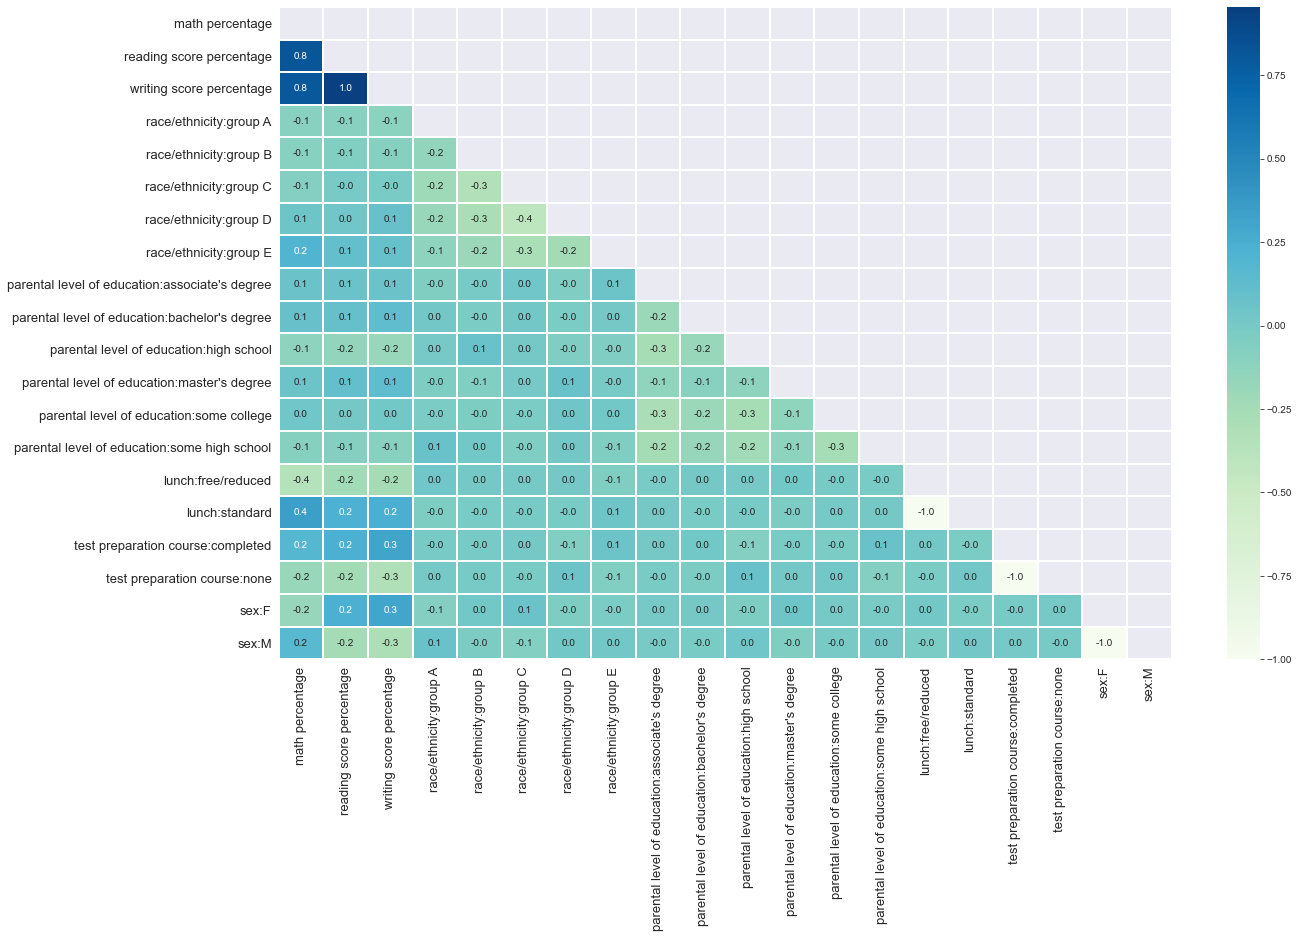

In [28]:
#matriz de correlaciones
corr2 = df2.corr(method='pearson') 

plt.figure(figsize=(20,12))
upp_mat = np.triu(corr2)
ax = sns.heatmap(corr2, cmap='GnBu', annot=True, mask = upp_mat, fmt='.1f', linewidths=1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 13)
plt.show()